# Mortality in European Countries by Age

## A Statistical analysis based on the data collected by Eurostat in 2018

We are interested in how various European countries compare to one another when we look at mortality in function of age. We want to know if there are any trends in the data that can be discerned. Can the countries be grouped into clusters? How does Belgium compare to the other countries? Is there a correlation between mortality in function of age and the region the country belongs to?

For 35 European countries, we have access to the total number of deaths in 2018, for each age. For these same countries, we also have access to the total population on the 1st of January 2018, for each age. Ages larger than or equal to 100 are grouped within a single category. This data is taken from the Eurostat database.

The European countries are grouped within four regions: North, East, South, and West. This is done in accordance with the "Standard country or area codes for statistical use" (M49) that is used by the United Nations Statistics Devision.

First we import the dataset and relevant packages. We also define useful variables.

In [22]:
data <- read.delim("mortality.csv")
library(cluster)
library(grDevices)

countries = data[,1]
regions = data[,2]
deaths_by_age = data[,3:103]
population_by_age = data[,104:204]

mortality = 100000 * deaths_by_age / population_by_age # number of deaths per 100000 people, separate for each age

`mortality` is an array where the rows represent different countries and the columns represent different ages. This array has several entries that are zero, which poses problems for the analysis. Zero is also an underestimation of the actual mortality rate. To improve the situation, we can replace the zero entries with the lowest non-zero value in that column.

In [23]:
I = which(mortality==0, arr.ind = T) # indices of the zero entries
for(i in 1:(length(I)/2)){
  j = I[i,1]
  k = I[i,2]
  column = mortality[,k]
  mortality[j,k] = min(column[column>0])
} # replace zero entry with the lowest non-zero value in that column

In [24]:
table(I) # country number 18 has the most entries that are zero
cat(paste("Country number 18 is", countries[18]))

I
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  3  2  6 13  6  4 10  5  8  4  5  5 15  6  3  4 42  1 13 14  7  3  1  1  1 
27 28 30 31 33 34 35 36 38 39 41 42 45 46 48 54 
 1  3  1  2  1  1  1  1  1  1  1  1  1  1  1  1 

Country number 18 is Liechtenstein

Liechtenstein has 42 different ages for which no people died in 2018. For these 42 ages, the mortality rates for Liechtenstein in our dataset are underestimations of the actual mortality rates. Liechtenstein also has large error bars on its data because the population is very small compared to all the other countries. This means that, of all the countries in the dataset, Liechtenstein has the most unreliable data. Right now, we cannot yet know if Liechtenstein's data is reliable enough to be used in our analysis.

The mortality rates for the lower ages are a lot smaller than for the higher ages. We would like to get as much information as possible from the dataset to distinguish between countries. To do this, we normalize the mortality rates for each age. Without the normalization, the analysis would ignore most information in the lower ages. The normalized mortality is plotted in function of age for four example countries.

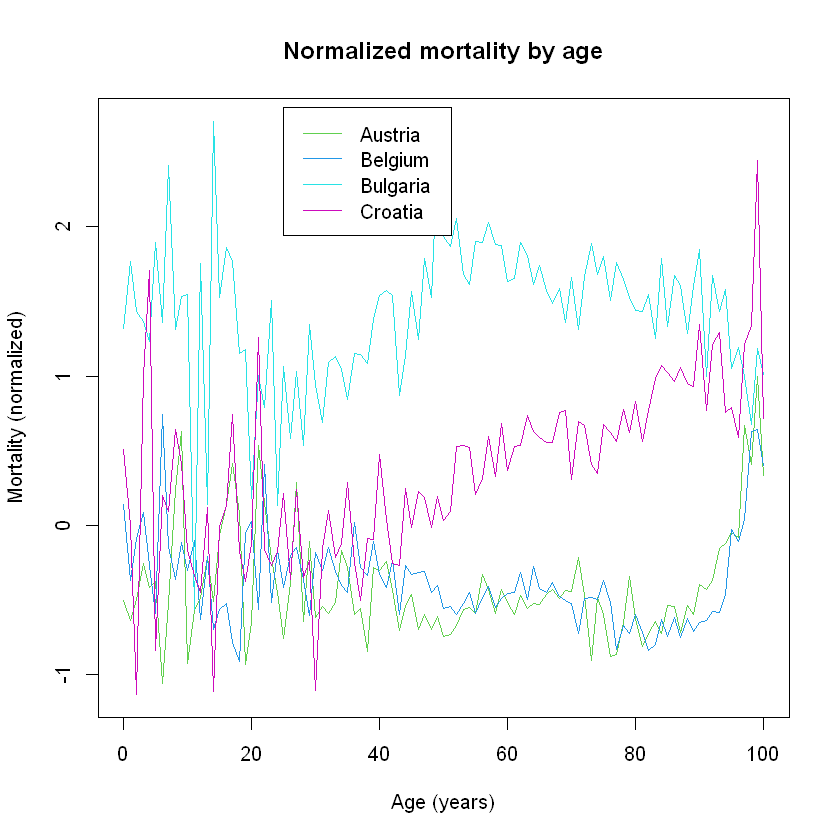

In [25]:
mortality_normalized = scale(mortality) # normalization of the data

matplot(c(0:100), t(mortality_normalized[1:4,]), type = 'l', lty=1, main='Normalized mortality by age', xlab='Age (years)',
        col=c(3:6), ylab='Mortality (normalized)')
legend(25, 2.8, legend=c('Austria', 'Belgium', 'Bulgaria', 'Croatia'), col=c(3:6), lty=c(1))

## Principal component analysis

Each country is a data point and has 101 variables (one for each age). Since there are more variables than data points, we should first carry out a reduction of the number of variables before doing a statistical analysis. This is done by using a principal component analysis. The principal components are combinations of the existing variables and are labeled as PC1, PC2, PC3,... The first few principle components contain most of the information within the dataset.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
Standard deviation,7.433131,3.420337,2.642274,2.044121,1.933658,1.711635,1.623108,1.560444,1.401573,1.319353,⋯,0.3134479,0.2777029,0.2474417,0.2269893,0.2164306,0.1987857,0.1902634,0.1676515,0.1147233,6.735502e-16
Proportion of Variance,0.547040,0.115830,0.069120,0.041370,0.037020,0.029010,0.026080,0.024110,0.019450,0.017230,⋯,0.0009700,0.0007600,0.0006100,0.0005100,0.0004600,0.0003900,0.0003600,0.0002800,0.0001300,0.000000e+00
Cumulative Proportion,0.547040,0.662870,0.732000,0.773370,0.810390,0.839400,0.865480,0.889590,0.909040,0.926270,⋯,0.9965000,0.9972600,0.9978700,0.9983800,0.9988400,0.9992300,0.9995900,0.9998700,1.0000000,1.000000e+00


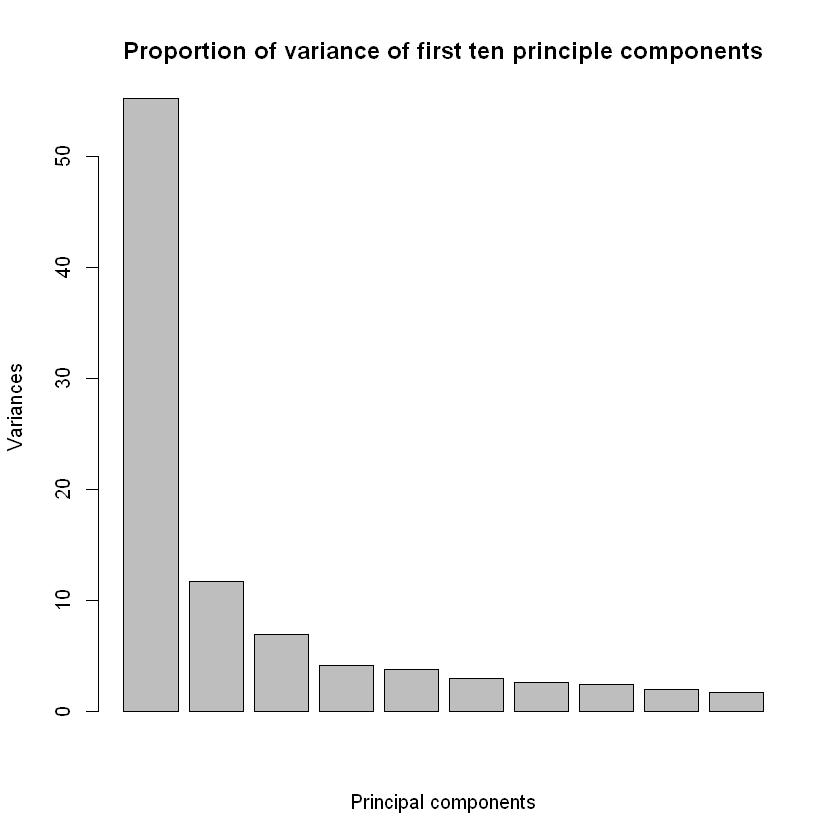

In [26]:
mortality_normalized.pca = prcomp(mortality_normalized,scale=TRUE) # principal component analysis
summary(mortality_normalized.pca)$importance
plot(mortality_normalized.pca, main = "Proportion of variance of first ten principle components",
     xlab = "Principal components")

The first four principle components contain 77% of the total variance within the normalized dataset. Starting from the fourth principal component, the proportion of variance almost flatlines. Because of this, we will discard all principle components beyond the fourth. It is important to interpret the first four principle components, since those will become our new variables. We can plot how much each of the 101 original variables contributes to each of the principle components.

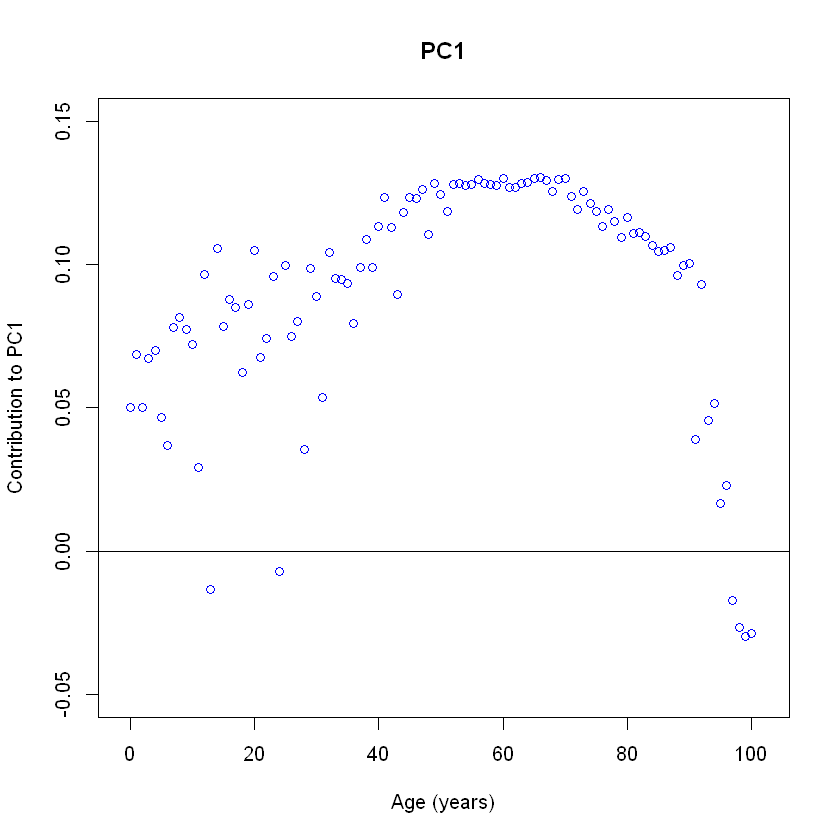

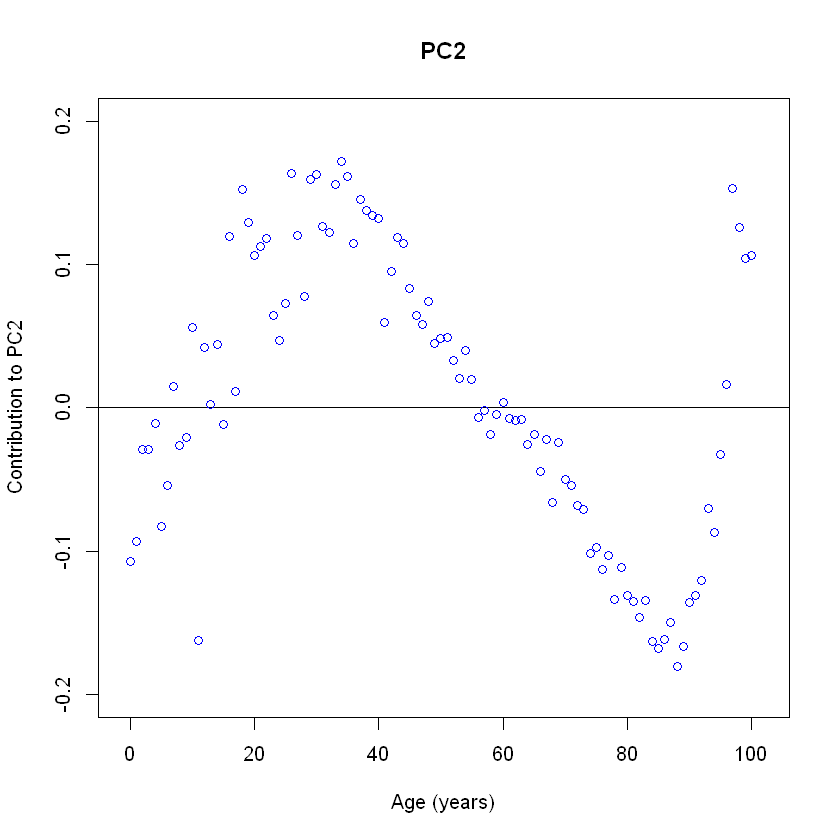

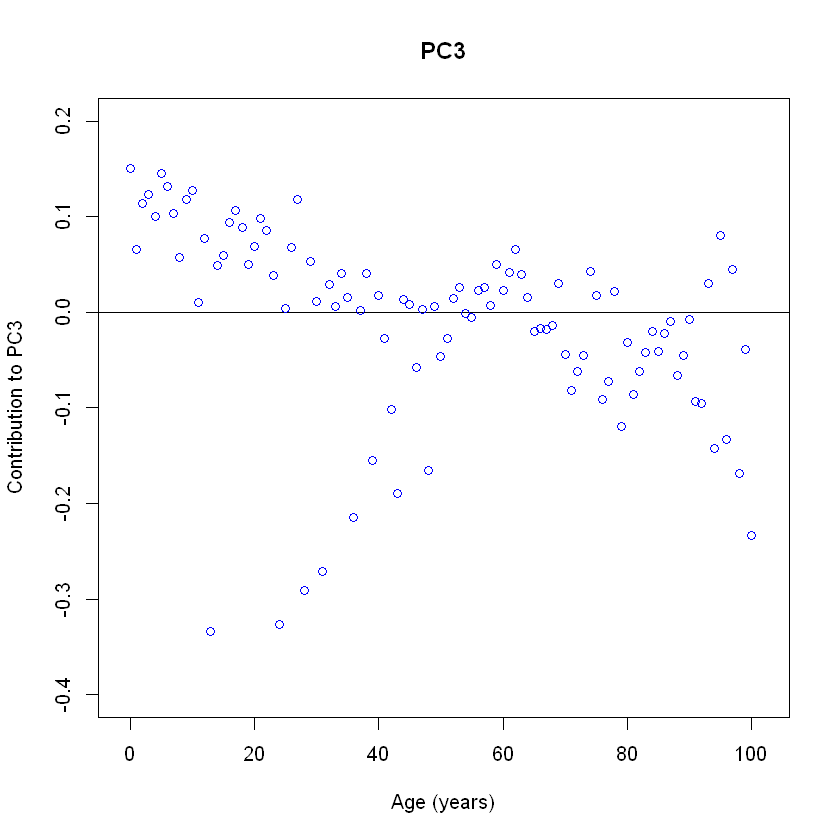

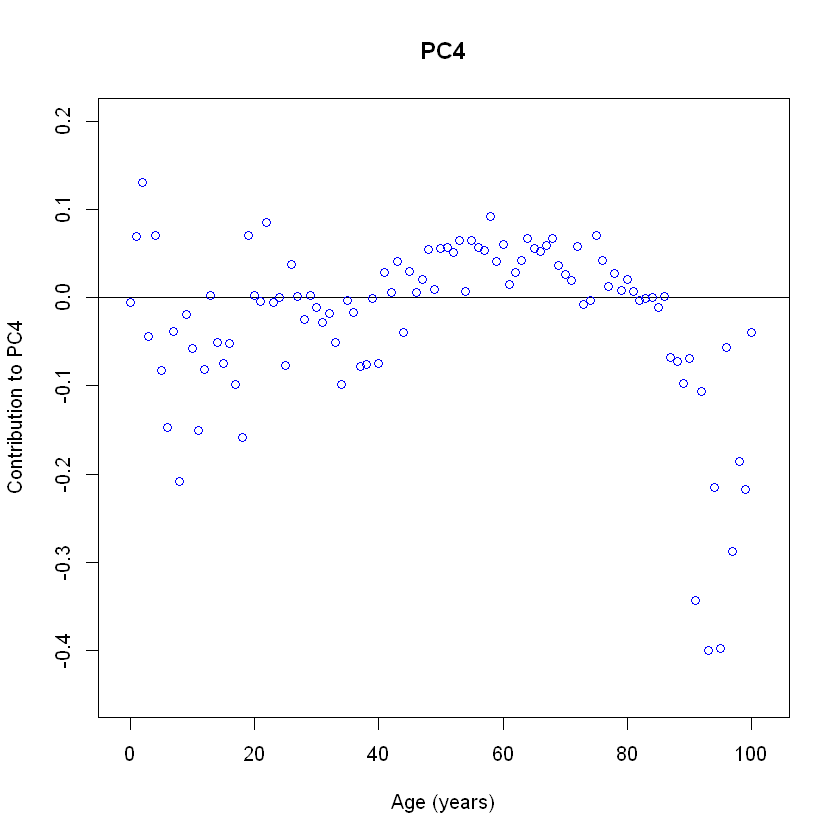

In [27]:
P = mortality_normalized.pca$rotation # rotation matrix between the original variables and the principal components
PC1 = as.matrix(P[,1]) # contributions to PC1
PC2 = as.matrix(P[,2]) # contributions to PC2
PC3 = as.matrix(P[,3]) # contributions to PC3
PC4 = as.matrix(P[,4]) # contributions to PC4

plot(c(-1,102), c(-0.05,0.15), type='n', main="PC1", xlab="Age (years)", ylab="Contribution to PC1")
abline(h=0)
points(c(0:100), PC1, type = 'p', col = 'blue')
#range tss 50 en 80 nadert 
#hoge PC1 wijst op hoge mortaliteit in deze range
#lage PC1 wijst op lage mortaliteit in deze range

plot(c(-1,102), c(-0.20,0.20), type='n', main="PC2", xlab="Age (years)", ylab="Contribution to PC2")
abline(h=0)
points(c(0:100), PC2, type = 'p', col = 'blue')
#20-40 en 80-90 (andere leeftijd ranges middelen ongeveer uit rond nul)
#hoge PC2 wijst op hoge mortaliteit rond 20-40 en lage mortaliteit rond 80-90
#lage PC2 wijst op hoge mortaliteit rond 80-90 en lage mortaliteit rond 20-40

plot(c(-1,102), c(-0.40,0.20), type='n', main="PC3", xlab="Age (years)", ylab="Contribution to PC3")
abline(h=0)
points(c(0:100), PC3, type = 'p', col = 'blue')
#Uitschieters van 20 tot 50

plot(c(-1,102), c(-0.45,0.20), type='n', main="PC4", xlab="Age (years)", ylab="Contribution to PC4")
abline(h=0)
points(c(0:100), PC4, type = 'p', col = 'blue')
#Waarden voor oudere leeftijden wegen meer door
#Hoge PC4 wijst op een lage mortaliteit op hogere leeftijd
#Lage PC4 wijst op een hoge mortaliteit op hogere leeftijd

As the above plots show, the variable PC1 gains positive contributions from nearly the entire age range. These contributions are not centered around zero, unlike with the other principal components. A high PC1 means that there is a high total mortality rate for all ages combined. PC1 is the main indicator with which we can distinguish between different countries.

PC2 shows how large the mortality rate is within the age range 20 to 40 compared to the age range 70 to 90. This compares the health of young adults to the health of elderly people in the population.

PC3 shows how large the mortality rate is within the age range 0 to 20 compared to the age range 20 to 50. This compares the health of children and adolescents to the health of young adults in the population. It could also be an indicator of infant mortality rates.

PC4 shows how large the mortality is within the age range 90 and above. This is an indicator of the life expectancy. A large and negative PC4 means that the life expectancy is high.

## Clustering

The first thing we do to look for trends in the data is look for clusters. Clusters are groups of data points that are clearly distinct from each other. Two possible tools to look for clusters are agglomerative clustering and divisive clustering. The first method finds clusters by merging data points while the second method finds clusters by starting from one big cluster and breaking it into pieces. The results are shown in a dendrogram: a tree-like structure in which clusters can be identified. An advantage of a dendrogram is that we can see how similar two particular countries are.

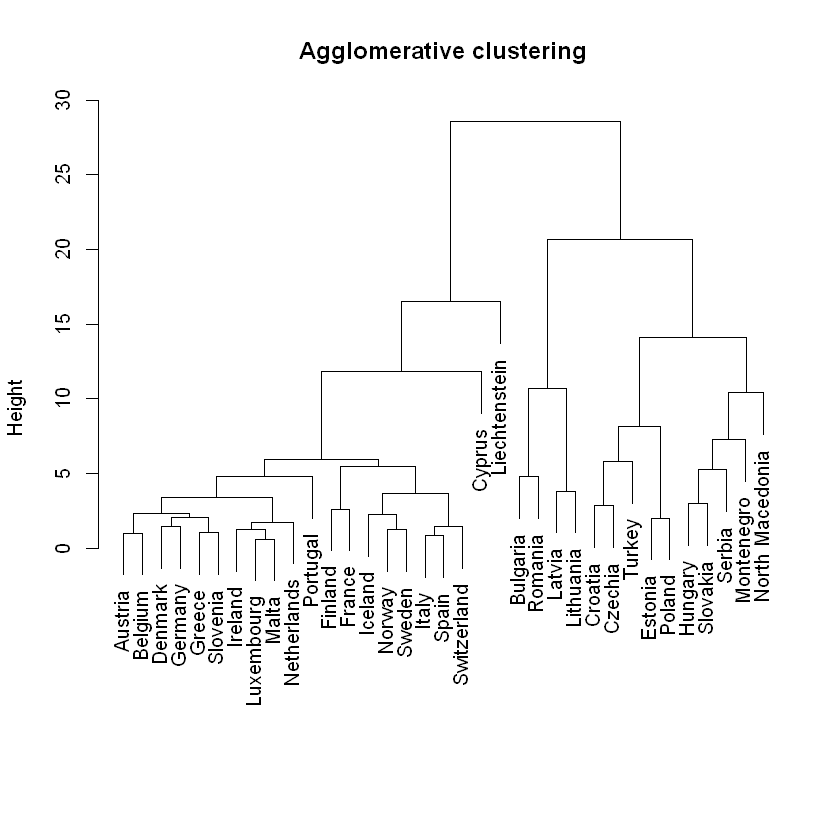

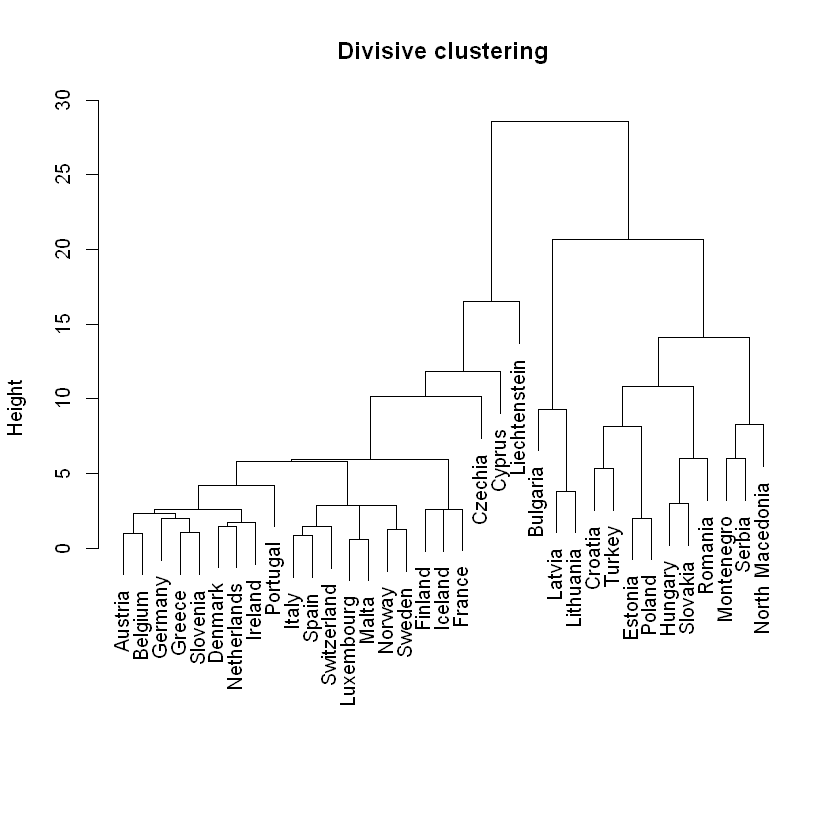

In [28]:
mortality_normalized.eig = eigen(cor(mortality_normalized))
P = mortality_normalized.eig$vectors
data_reduced = as.matrix(mortality_normalized)%*%P[,1:4] # new dataset with reduced dimensions

# agglomerative clustering
clust.agnes <- agnes(data_reduced, method="complete") # the complete linkage method gives the best result here
pltree(clust.agnes, main="Agglomerative clustering", labels=countries, sub=NA, xlab=NA)

# divisive clustering
clust.diana <- diana(data_reduced)
pltree(clust.diana, main="Divisive clustering", labels=countries, sub=NA, xlab=NA)

In [29]:
# find the countries for which the two clustering methods don't lign up
difference <- countries[cutree(clust.agnes,k=2)!=cutree(clust.diana,k=2)]
cat(paste("The two clustering methods produce a different answer for:", difference))

The two clustering methods produce a different answer for: Czechia

The above cluster analysis suggests that there are two clusters in the data. Both clusters contain a few outliers (countries that are only loosely bound to one of the two clusters). Liechtenstein is the worst outlier. The two methods that we used yield nearly identical results. The only difference is Czechia, which changes cluster depending on the method that is used. The country most similar to belgium in our dataset is found to be Austria. This can also be observed qualitatively in the first plot of this document, which showcases four countries including Belgium and Austria. We take this as confirmation that our cluster analysis is on the right track.

Another popular method for cluster analysis is k-means clustering. This method fixes the number of clusters at the start and uses an iterative algorithm to make the clusters as compact as possible. How much each data point belong to its cluster is given by a number between -1 and 1 called the silhouette width.

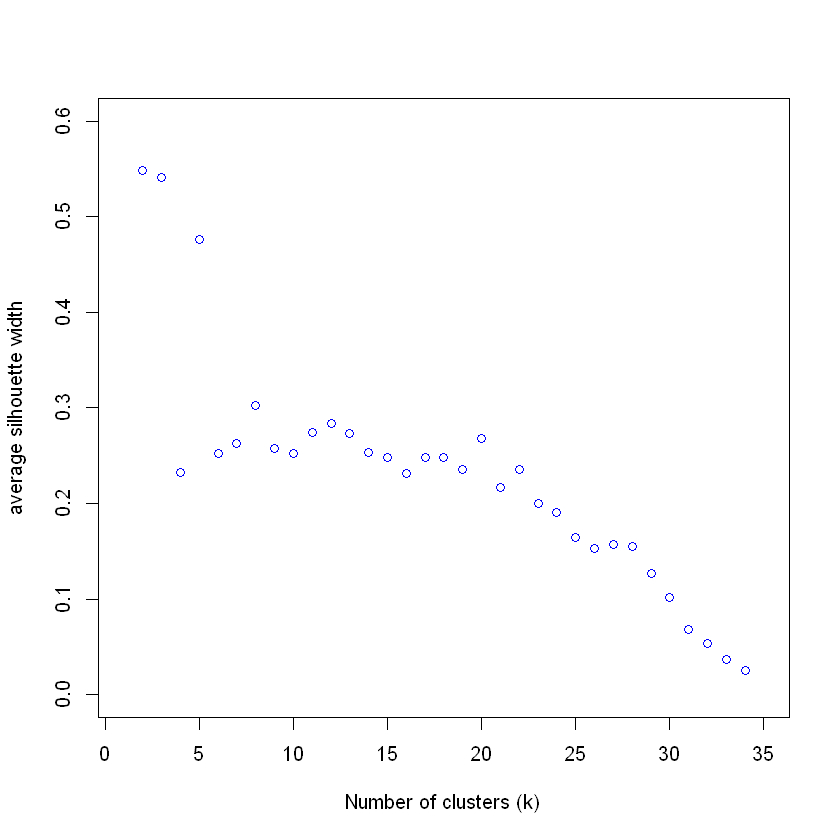

In [30]:
K = 2:34 # range for number of clusters
S = NULL
for (k in K) {
    set.seed(1) # to make the analysis reproducable
    clust.kmeans <- kmeans(data_reduced, k)
    silhouette.width <- silhouette(clust.kmeans$cluster,
                                    dist(data_reduced)) # measure of how much a data point belongs to its cluster
    S = c(S, summary(silhouette.width)$avg.width) # add the average silhouette width to the list
}

plot(c(1,35), c(0,0.6), type='n', xlab="Number of clusters (k)", ylab="average silhouette width")
points(K, S, col = 'blue')

The average silhouette width is maximal for `k=2` although `k=3` is close behind. Both options give an average silhouette width of roughly 0.54, which means that the clusters are reasonable but not particularly strong. We can check how similar these clusters are compared to the clusters found with earlier methods. We do this using a contingency table.

In [31]:
set.seed(1)
clust.kmeans2 <- kmeans(data_reduced, 2) # 2 clusters
clust.kmeans3 <- kmeans(data_reduced, 3) # 3 clusters

table(cutree(clust.agnes,k=2), clust.kmeans2$cluster, dnn=c("Agnes clusters  ", "K-means clusters"))
table(cutree(clust.agnes,k=3), clust.kmeans3$cluster, dnn=c("Agnes clusters  ", "K-means clusters"))

                K-means clusters
Agnes clusters    1  2
               1  0 21
               2 14  0

                K-means clusters
Agnes clusters    1  2  3
               1 21  0  0
               2  0  0  4
               3  0 10  0

The k-means method finds the same clusters as the agglomerative clustering method, both in the case of 2 clusters and 3 clusters. The case with 2 clusters is marginally preferred by the k-means method. We will continue our data analysis by assuming there are 2 clusters and comparing them to the four regions.

In [32]:
clust <- clust.kmeans2$cluster
table(clust, regions, dnn=c("Clusters  ", "Regions"))

          Regions
Clusters   E N S W
         1 6 3 5 0
         2 0 5 7 9

There is a clear divide between east and west. The northern and southern countries are pretty evenly divided between the two clusters. We would like to know how the mortality rates differ between countries in the east or west of Europe. To do this, we plot the data using the four principal components.

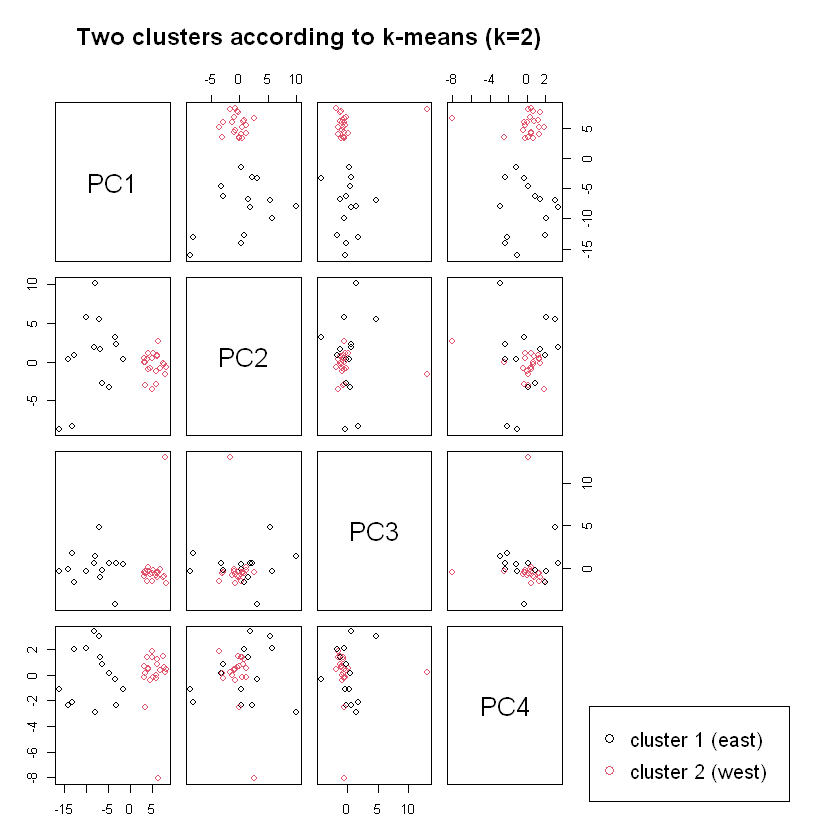

In [33]:
pairs(data_reduced, col=clust, labels=c('PC1', 'PC2', 'PC3', 'PC4'), main='Two clusters according to k-means (k=2)',
      oma=c(3,3,6,17))
par(xpd = TRUE)
legend("bottomright", legend=c('cluster 1 (east)', 'cluster 2 (west)'), col=c(1,2), pch=c(1))

The main variable differentiating the two clusters is the first principal component. It is clear that PC1 is strongly correlated with the divide between east and west. We see that all countries with a positive PC1 belong to the western cluster and all countries with a negative PC1 belong to the eastern cluster. This way, mortality in function of age can be used to distinguish between the east and west of Europe.

For the other three principal components, the two clusters have at a glance the same average. This can be confirmed using statistical tests like for example the Shapiro-Wilk test. Another difference between the two clusters is the variance: the data points of the first cluster lie farther apart compared to the second cluster. This could be due to the countries of the second cluster having less strict healthcare regulations, which would explain the larger variance.

## Interpreting the Difference

PC1 is an abstract variable. We would like to find and interpretation for the difference between the two clusters. Interpreting results is crucial in order to drive action in the real world and improve healthcare standards.

Earlier, we guessed that PC1 is strongly correlated to the total mortality in a country. We can test whether the average total mortality differs significantly between the two clusters. We first test whether the total mortality follows a normal distribution for each of the clusters, because this is a requirement for the other tests.

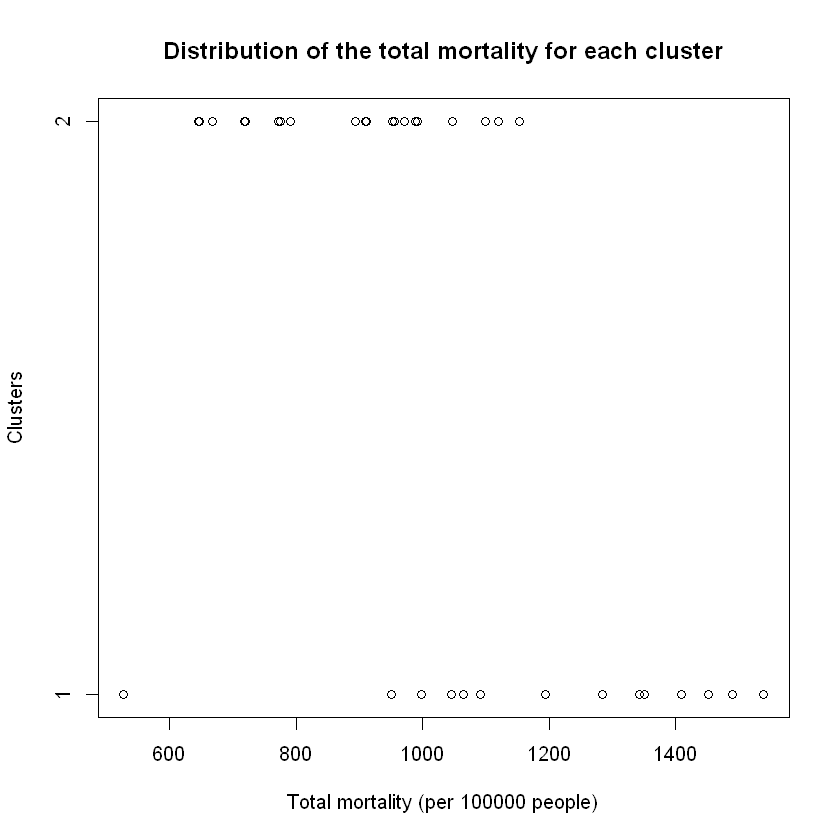

In [34]:
total_deaths = rowSums(deaths_by_age)
total_population = rowSums(population_by_age)
total_mortality = 100000 * total_deaths / total_population # number of deaths per 100000 people, for all age combined

plot(total_mortality, clust, xlab="Total mortality (per 100000 people)", ylab="Clusters", yaxp=c(1,2,1),
    main="Distribution of the total mortality for each cluster")

clust1_mortality = total_mortality[which(clust == 1)] # list of total mortalities in cluster 1
clust2_mortality = total_mortality[which(clust == 2)] # list of total mortalities in cluster 2

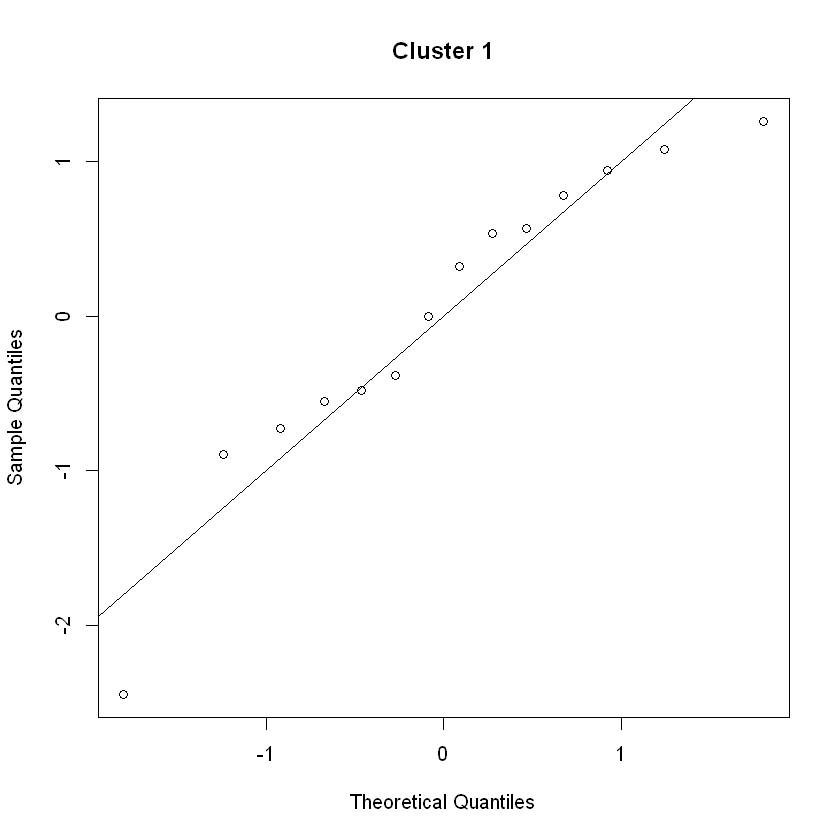

In [35]:
# testing normality using q-q plots and the Shapiro-Wilk test

qqnorm(scale(clust1_mortality), main='Cluster 1')
abline(0, 1)

In [36]:
shapiro.test(clust1_mortality)


	Shapiro-Wilk normality test

data:  clust1_mortality
W = 0.92168, p-value = 0.2325


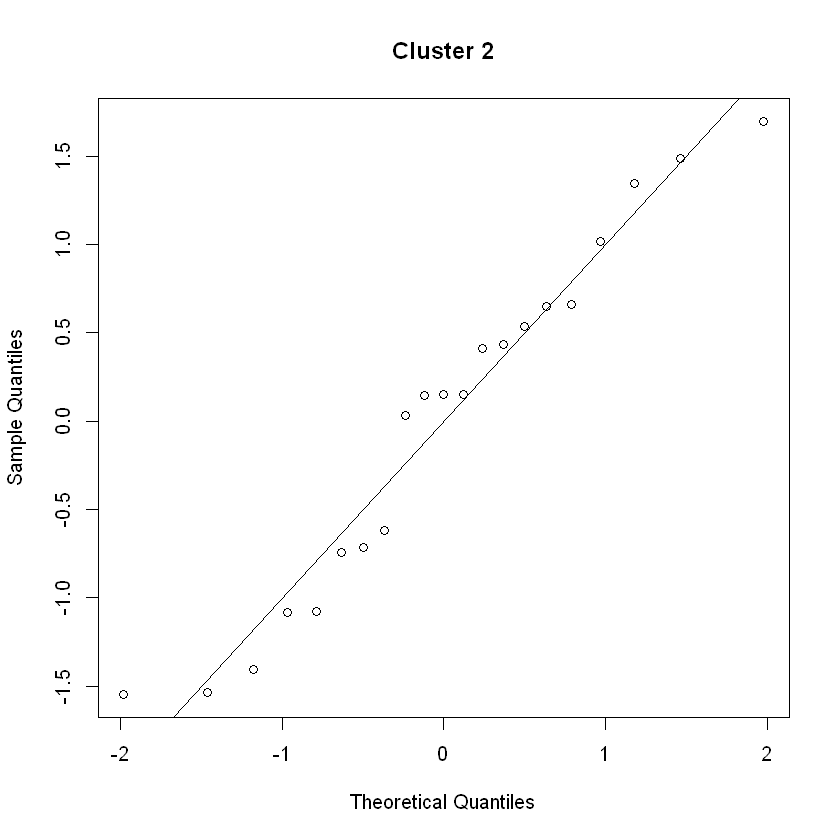

In [37]:
qqnorm(scale(clust2_mortality), main='Cluster 2')
abline(0, 1)

In [38]:
shapiro.test(clust2_mortality)


	Shapiro-Wilk normality test

data:  clust2_mortality
W = 0.94909, p-value = 0.3274


For both clusters, the quantile–quantile (q-q) plots look like we could expect from a normally distributed dataset. Using the Shapiro-Wilk test and a significance level of 5%, we cannot reject the possibility that the total mortality is normally distributed for both clusters.

We will assume that total mortality is normally distributed for both clusters. Before we can test whether the clusters have the same average, we first need to know whether the clusters have the same variance. This is done using the F-test.

In [39]:
var.test(clust1_mortality, clust2_mortality, alternative = "two.sided")


	F test to compare two variances

data:  clust1_mortality and clust2_mortality
F = 3.0261, num df = 13, denom df = 20, p-value = 0.02567
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.147585 8.919995
sample estimates:
ratio of variances 
          3.026116 


Using the F-test and a significance level of 5%, we reject the assumption that the total mortality has the same variance for both clusters. The variance of the first cluster is greater than that of the second cluster.

Finally, we can test whether the cluster averages are significantly different from each other. This is done using an independent t-test with unequal variances.

In [40]:
t.test(clust1_mortality, clust2_mortality, var.equal=FALSE)


	Welch Two Sample t-test

data:  clust1_mortality and clust2_mortality
t = 3.8284, df = 18.767, p-value = 0.001155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 139.5347 476.7509
sample estimates:
mean of x mean of y 
1195.4690  887.3262 


Using the t-test and a significance level of 5%, we reject the assumption that the total mortality has the same mean for both clusters. The mean total mortality in the eastern cluster is significantly greater than the mean total mortality in the western cluster. This is one of the main results from our analysis of the data. This result points to the average eastern European country having a worse healthcare system than the average western European country. For countries in the north and south of Europe, some adhere closer to the trends of eastern Europe while others adhere closer to the trends of western Europe. This divide in behavior is clear from there being two distinct clusters.

There's one last thing we can do to give more specific feedback to the healthcare system of countries in eastern Europe. The dataset consists of the mortality rates for different ages. We can look at the difference in mortality between the two clusters in function of age. This will help us determine which age groups are most at a disadvantage in eastern Europe compared to Western Europe.

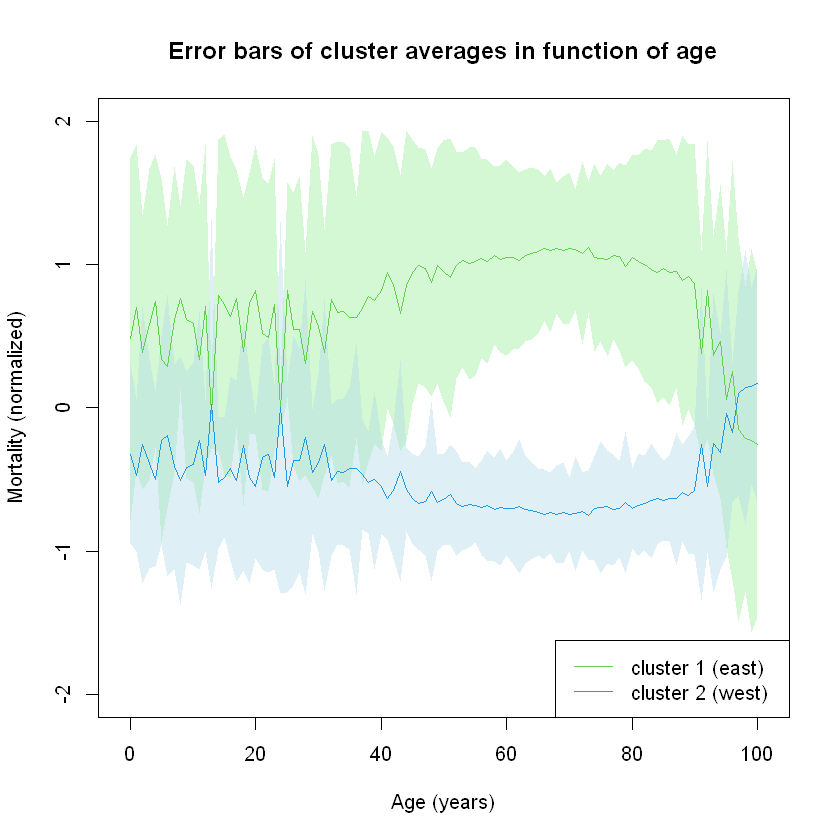

In [41]:
# average normalized mortalities by age
clust1_means = apply(mortality_normalized[which(clust == 1),], 2, mean)
clust2_means = apply(mortality_normalized[which(clust == 2),], 2, mean)

# standard deviation of normalized mortalities by age
clust1_sd = apply(mortality_normalized[which(clust == 1),], 2, sd)
clust2_sd = apply(mortality_normalized[which(clust == 2),], 2, sd)

# plot of the error bars of the cluster averages in function of age
x = c(0:100)
plot(NA, NA, xlab="Age (years)", ylab="Mortality (normalized)",
     main="Error bars of cluster averages in function of age", xlim=c(-1,101), ylim=c(-2,2))
polygon(c(x, rev(x)), c(clust1_means+clust1_sd, rev(clust1_means-clust1_sd)), border=NA,
        col=adjustcolor("lightgreen", alpha.f=0.4))
polygon(c(x, rev(x)), c(clust2_means+clust2_sd, rev(clust2_means-clust2_sd)), border=NA,
        col=adjustcolor("lightblue", alpha.f=0.4))
lines(x, clust1_means, col=3)
lines(x, clust2_means, col=4)
legend("bottomright", legend=c('cluster 1 (east)', 'cluster 2 (west)'), col=c(3,4), lty=1)

For the ages 0 to 40 and also above 90, the error bars of the two clusters overlap, indicating only a small difference in the mortality rates between the two clusters. Between roughly the ages 40 and 90, the error bars do not overlap. The error bars lie the furthest apart around age 70. We can conclude that it is especially the people between 40 and 90 who are at a disadvantage when living in a typical eastern European country compared to living in a typical western European country.

## The Situation in Belgium

To finish this analysis, we briefly look at how Belgium compares to the average mortality in its cluster.

The z-score of Belgium within its cluster is 0.534615533596066

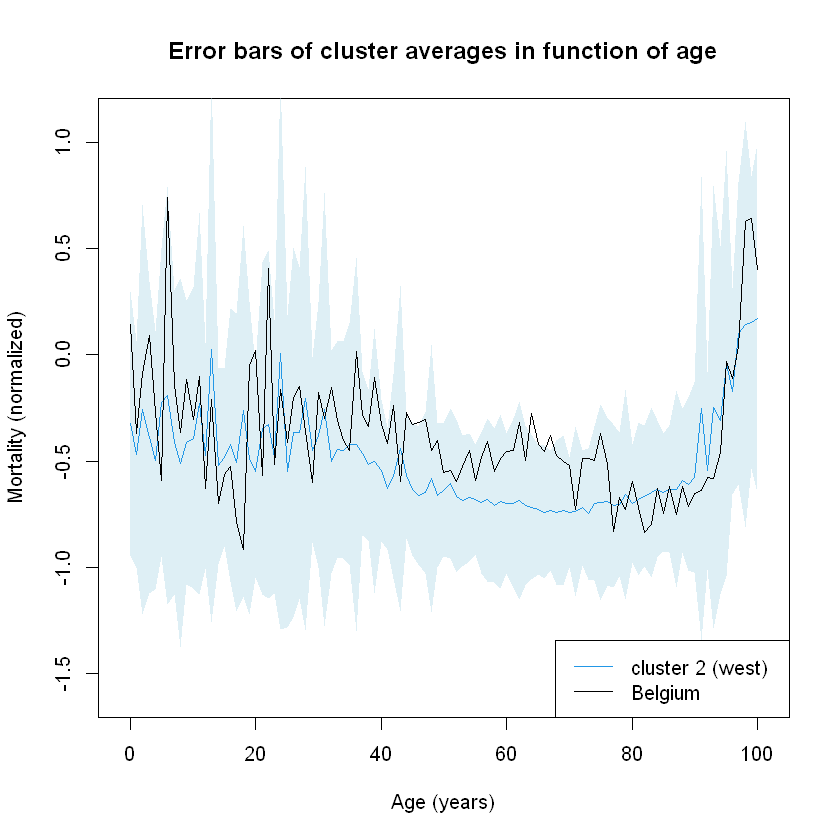

In [42]:
zscore_Belgium = (total_mortality[2] - mean(clust2_mortality)) / sd(clust2_mortality)
cat(paste("The z-score of Belgium within its cluster is", zscore_Belgium))

# plot of the error bars of the second cluster average in function of age, with Belgium added
plot(NA, NA, xlab="Age (years)", ylab="Mortality (normalized)",
     main="Error bars of cluster averages in function of age", xlim=c(-1,101), ylim=c(-1.6,1.1))
polygon(c(x, rev(x)), c(clust2_means+clust2_sd, rev(clust2_means-clust2_sd)), border=NA,
        col=adjustcolor("lightblue", alpha.f=0.4))
lines(x, clust2_means, col=4)
lines(x, mortality_normalized[2,], col=1)
legend("bottomright", legend=c('cluster 2 (west)', 'Belgium'), col=c(4,1), lty=1)

The total mortality in Belgium lies 0.53 standard deviations above the average in the cluster of western countries. Especially the ages 35 to 75 are more vulnerable than average, as can be seen from the above plot. although, for nearly all ages, the mortality lies within one standard deviation from the average. This means that, although there is room for improvement, the situation in Belgium regarding mortality is not exceptionally bad.